In [1]:
# !pip install pandas nltk seaborn matplotlib wordcloud numpy pyarrow fastparquet

In [2]:
import pandas as pd
import nltk
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import re
import numpy as np
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
path = os.getcwd()

In [4]:
df = pd.read_parquet(os.path.join(path, "dataset/used/train.parquet"))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id                            193883 non-null  int64 
 1   url                           193883 non-null  object
 2   clean_article                 193883 non-null  object
 3   clean_summary                 193883 non-null  object
 4   extractive_summary            193883 non-null  object
 5   ext_clean_article             193883 non-null  object
 6   ext_clean_summary             193883 non-null  object
 7   extractive_summary_sentences  193883 non-null  object
 8   ext_extractive_summary        193883 non-null  object
 9   prep_clean_article            193883 non-null  object
 10  prep_clean_summary            193883 non-null  object
 11  prep_extractive_summary       193883 non-null  object
 12  prep_clean_article_no_sw      193883 non-null  object
dtyp

In [6]:
df['url_intisari'] = df['url'].apply(lambda x: 'Ya' if 'intisari' in x else 'Tidak')

In [7]:
df[df['url_intisari'] == 'Ya'].shape[0]

388

In [8]:
def extract_location(article):
    # Pastikan artikel bertipe string
    
    # Cek apakah artikel diawali dengan 'Liputan6.com,'
    if article.startswith("Liputan6.com,"):
        # Hilangkan 'Liputan6.com, ' dan ambil teks sebelum ':'
        return article.replace("Liputan6.com, ", "").split(":")[0].strip()
    else:
        return None

# Terapkan fungsi ke clean_article untuk membuat kolom lokasi_berita
df['lokasi_berita'] = df['ext_clean_article'].apply(extract_location)

In [9]:
def extract_author(article):
    # Pastikan artikel bertipe string
    article = str(article).strip()
    
    # Gunakan regex untuk mengambil teks dalam kurung di akhir kalimat
    match = re.search(r'\(([^\(\)]+)\)\.$', article)
    
    if match:
        return match.group(1)  # Mengambil isi dalam kurung
    else:
        return None

# Terapkan fungsi ke clean_article untuk membuat kolom author_berita
df['author_berita'] = df['ext_clean_article'].apply(extract_author)

In [10]:
def count_words(article):
    # Pisahkan kata-kata berdasarkan spasi dan hitung jumlahnya
    return len(article.split())

In [11]:
df['clean_article_length'] = df['ext_clean_article'].apply(count_words)
df['clean_summary_length'] = df['ext_clean_summary'].apply(count_words)
df['extractive_summary_length'] = df['ext_extractive_summary'].apply(count_words)

In [12]:
def extract_date(article):
    article = str(article).strip()
    match = re.search(r'\b\w+\(\d{1,2}/\d{1,2}\)', article)  # Mengambil format seperti "Ahad(27/5)"
    return match.group(0) if match else None

In [13]:
df['tanggal_berita'] = df['ext_clean_article'].apply(extract_date)

In [26]:
random_sample = df.sample(n=5, random_state=2)  # random_state untuk konsistensi hasil
for index, row in random_sample.iterrows():
    print(f"1. Index: {index}")
    print(f"2. Url: {row['url']}")
    print(f"2.1. Url Intisari: {row['url_intisari']}")
    print("-" * 50)
    
    print(f"3.1. Clean Article:\n{row['ext_clean_article']}")
    print(f"3.2. Prep Clean Article:\n{row['prep_clean_article']}")
    print(f"3.3. Prep Clean Article No Stopwords:\n{row['prep_clean_article_no_sw']}")
    print(f"3.4. Words Length: {row['clean_article_length']}")
    print("-" * 50)
    
    print(f"4.1. Clean Summary:\n{row['ext_clean_summary']}")
    print(f"4.2. Prep Clean Summary:\n{row['prep_clean_summary']}")
    print(f"4.3. Words Length: {row['clean_summary_length']}")
    print("-" * 50)
    
    print(f"5.1. Extractive Summary:\n{row['ext_extractive_summary']}")
    print(f"5.2. Prep Extractive Summary:\n{row['prep_extractive_summary']}")
    print(f"5.3. Words Length: {row['extractive_summary_length']}")
    print("-" * 50)

    rat_clean = row['clean_article_length']/row['clean_summary_length']
    rat_ext = row['clean_article_length']/row['extractive_summary_length']
                                            
    print(f"6.1. Ratio Kata:")
    print(f"*. Clean Article - Clean Summary: {row['clean_article_length']}/{row['clean_summary_length']} = {round(rat_clean,2)}")
    print(f"*. Clean Article - Extractive Summary: {row['clean_article_length']}/{row['extractive_summary_length']} = {round(rat_ext,2)}")
    print(f"6.2. Lokasi Berita:\n{row['lokasi_berita']}")
    print(f"6.3. Tanggal Berita:\n{row['tanggal_berita']}")
    print(f"6.4. Penulis Berita:\n{row['author_berita']}")
    print("-" * 100)  # Pembatas antar tweet

1. Index: 88742
2. Url: https://www.liputan6.com/news/read/217525/cinta-membuat-adri-manan-rani-bertahan
2.1. Url Intisari: Tidak
--------------------------------------------------
3.1. Clean Article:
LEWAT cintalah semua yang pahit akan jadi manis. Tepatlah kiranya, kutipan puisi pujangga Jalaluddin Rumi ini diberikan buat Adri Manan dan Meliana Pancarani alias Rani. Keduanya berhasil mendayung bahtera keluarga di tengah deraan penolakan pihak keluarga Rani. Setahun lampau, memang, Adri harus berjuang mendapat restu ibunda Rani lantaran budaya yang tak sepaham. Berkat keluwesan pesulap itu semua berjalan lancar. Buah hati mereka-lah yang menjadi penyatu keluarga. Adri mengakui sulit menikah dalam kondisi yang tidak diinginkan. " Kami bertekad karena pernikahan semacam itu punya sejarah yang manis, " tegas pria berambut pirang itu. Rani pertama kali jatuh hati saat menggelar malam dana untuk acara di vihara. Selanjutnya mereka intens bertemu di sejumlah show. " Saya suka karena dia bis

In [15]:
def get_ngrams(text, n):
    ngrams_list = []
    for line in text:
        tokens = nltk.word_tokenize(line)
        ngrams_list.extend([' '.join(gram) for gram in nltk.ngrams(tokens, n)])
    return ngrams_list

def get_most_common_ngrams(ngrams, jumlah_rank):
    words_count = Counter(ngrams)
    most_common_words = words_count.most_common(jumlah_rank)
    most_common_df = pd.DataFrame(most_common_words, columns=['ngram', 'count'])
    total_words = sum(words_count.values())
    most_common_df['percentage'] = (most_common_df['count'] / total_words) * 100
    return most_common_df

def plot_most_common_ngrams(most_common_df, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='ngram', data=most_common_df, palette='viridis', hue='ngram', dodge=False)
    
    for i in range(len(most_common_df)):
        count = most_common_df['count'][i]
        plt.text(count, i, f'{count}', color='black', va='center')

    plt.title(title)
    plt.xlabel('Frekuensi')
    plt.ylabel('N-gram')
    plt.legend([],[], frameon=False)  # Menghilangkan legenda
    plt.show()

In [16]:
from collections import Counter
# Mengambil artikel yang telah diproses
text = list(df['prep_clean_article_no_sw'])
jumlah_rank = 10

In [34]:
lokasi_terbanyak = list(df['lokasi_berita'])
jumlah_rank = 10

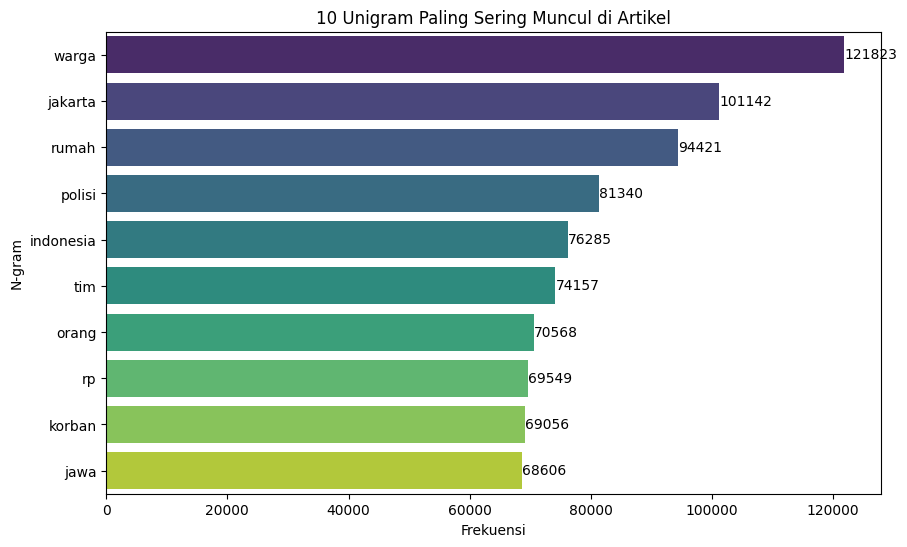

In [17]:
unigrams = get_ngrams(text, 1)
most_common_unigrams = get_most_common_ngrams(unigrams, jumlah_rank)
plot_most_common_ngrams(most_common_unigrams, f'{jumlah_rank} Unigram Paling Sering Muncul di Artikel')

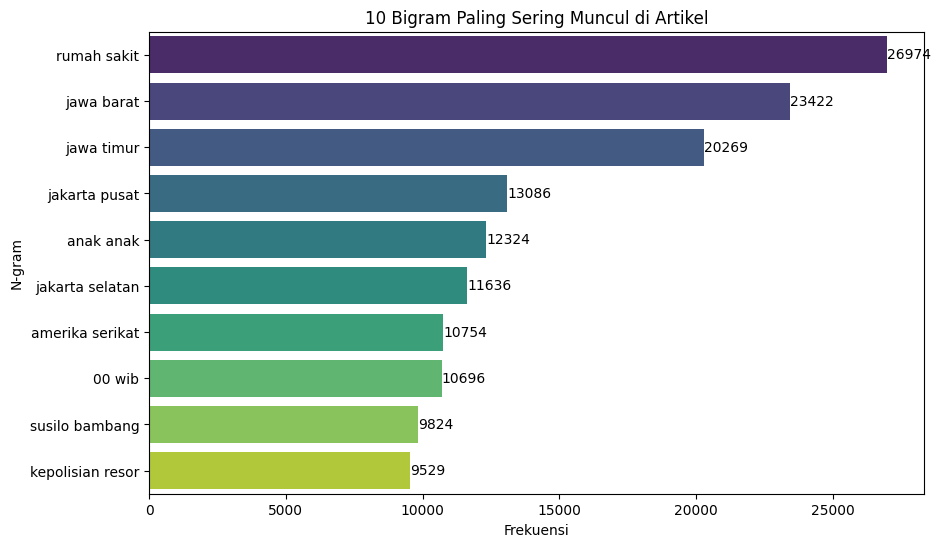

In [18]:
bigrams = get_ngrams(text, 2)
most_common_bigrams = get_most_common_ngrams(bigrams, jumlah_rank)
plot_most_common_ngrams(most_common_bigrams, f'{jumlah_rank} Bigram Paling Sering Muncul di Artikel')

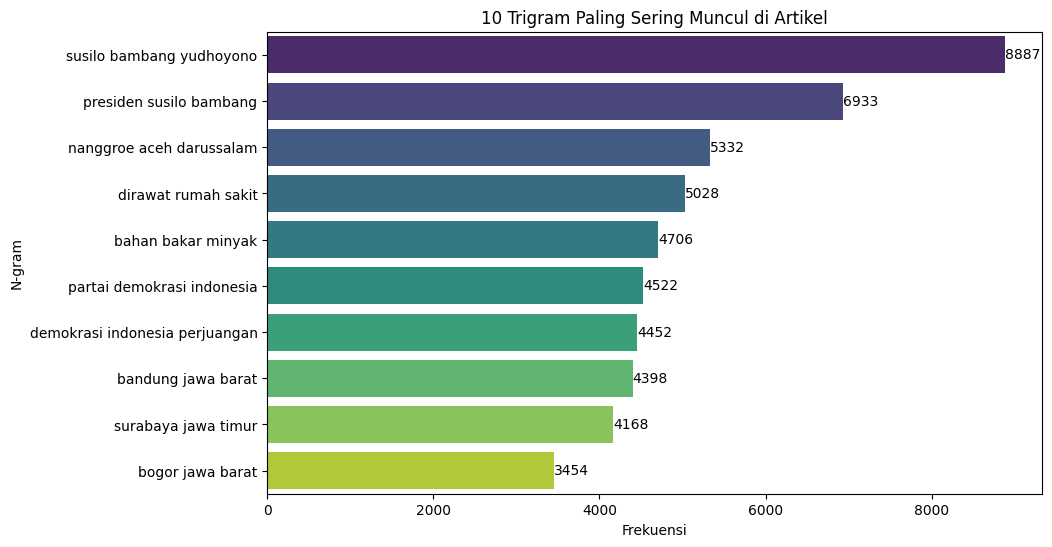

In [19]:
trigrams = get_ngrams(text, 3)
most_common_trigrams = get_most_common_ngrams(trigrams, jumlah_rank)
plot_most_common_ngrams(most_common_trigrams, f'{jumlah_rank} Trigram Paling Sering Muncul di Artikel')

In [20]:
def count_words(text):
    tokens = word_tokenize(text)  # Tokenisasi kata menggunakan nltk
    return len(tokens)

In [21]:
total_words_train = df['ext_clean_article'].apply(count_words).sum()

In [22]:
print(total_words_train)

44928905


In [23]:
df_train = pd.read_parquet(os.path.join(path, "dataset/used/train.parquet"))
df_test = pd.read_parquet(os.path.join(path, "dataset/used/test.parquet"))
df_dev = pd.read_parquet(os.path.join(path, "dataset/used/dev.parquet"))
df_xtreme_dev = pd.read_parquet(os.path.join(path, "dataset/used/xtreme_dev.parquet"))
df_xtreme_test = pd.read_parquet(os.path.join(path, "dataset/used/xtreme_test.parquet"))

In [24]:
jumlah_data = df_train.shape[0]+df_test.shape[0]+df_dev.shape[0]+df_xtreme_dev.shape[0]+df_xtreme_test.shape[0]

print(f"Jumlah Data Train: {df_train.shape[0]}")
print(f"Jumlah Data Test : {df_test.shape[0]}")
print(f"Jumlah Data Dev : {df_dev.shape[0]}")
print(f"Jumlah Data Xtreme Dev : {df_xtreme_dev.shape[0]}")
print(f"Jumlah Data Xtreme Test : {df_xtreme_test.shape[0]}")
print(f"Jumlah Seluruh Data : {jumlah_data}")

Jumlah Data Train: 193883
Jumlah Data Test : 10972
Jumlah Data Dev : 10972
Jumlah Data Xtreme Dev : 4948
Jumlah Data Xtreme Test : 3862
Jumlah Seluruh Data : 224637


In [25]:
train_word_sum = df_train['ext_clean_article'].apply(count_words).sum()
test_word_sum = df_test['ext_clean_article'].apply(count_words).sum()
dev_word_sum = df_dev['ext_clean_article'].apply(count_words).sum()
xtreme_dev_word_sum = df_xtreme_test['ext_clean_article'].apply(count_words).sum()
xtreme_test_word_sum = df_xtreme_dev['ext_clean_article'].apply(count_words).sum()

In [43]:
print(f"Jumlah Kata Train : {round(train_word_sum / 1_000_000)} M")
print(f"Jumlah Kata Test : {round(test_word_sum / 1_000_000)} M")
print(f"Jumlah Kata Dev : {round(dev_word_sum / 1_000_000)} M")
print(f"Jumlah Kata Xtreme Dev : {round(xtreme_dev_word_sum / 1_000_000)} M")
print(f"Jumlah Kata Xtreme Test : {round(xtreme_test_word_sum / 1_000_000)} M")
print(f"Jumlah Kata pada Dataset : {round((train_word_sum+test_word_sum+dev_word_sum+xtreme_dev_word_sum+xtreme_test_word_sum) / 1_000_000)} M")

Jumlah Kata Train : 45 M
Jumlah Kata Test : 2 M
Jumlah Kata Dev : 2 M
Jumlah Kata Xtreme Dev : 1 M
Jumlah Kata Xtreme Test : 1 M
Jumlah Kata pada Dataset : 52 M


In [44]:
train_summary_sum = df_train['ext_clean_summary'].apply(count_words).sum()
test_summary_sum = df_test['ext_clean_summary'].apply(count_words).sum()
dev_summary_sum = df_dev['ext_clean_summary'].apply(count_words).sum()
xtreme_dev_summary_sum = df_xtreme_test['ext_clean_summary'].apply(count_words).sum()
xtreme_test_summary_sum = df_xtreme_dev['ext_clean_summary'].apply(count_words).sum()

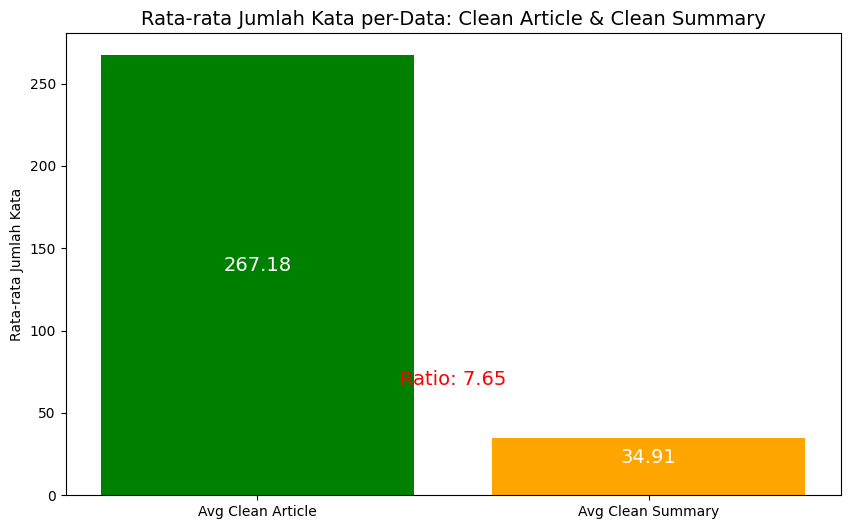

In [46]:
jumlah_data = df.shape[0]
word_dataset = train_word_sum+test_word_sum+dev_word_sum+xtreme_dev_word_sum+xtreme_test_word_sum
word_summary = train_summary_sum+test_summary_sum+dev_summary_sum+xtreme_dev_summary_sum+xtreme_test_summary_sum

avg_article_words = word_dataset / jumlah_data
avg_summary_words = word_summary / jumlah_data

ratio_avg = avg_article_words / avg_summary_words

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
categories = ['Avg Clean Article', 'Avg Clean Summary']
word_counts = [avg_article_words, avg_summary_words]

bars = plt.bar(categories, word_counts, color=['green', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - yval*0.5, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=14, color='white')

plt.text(0.5, avg_article_words/4, f'Ratio: {ratio_avg:.2f}', ha='center', fontsize=14, color='red')


plt.title('Rata-rata Jumlah Kata per-Data: Clean Article & Clean Summary', fontsize=14)
plt.ylabel('Rata-rata Jumlah Kata')

plt.show()